In [1]:
import pandas as pd
import numpy as np
import math
from scipy.stats import normaltest
from scipy.stats import shapiro
# from statsmodels.stats.diagnostic import het_breuschpagan
pd.options.display.float_format = '{:,.3f}'.format
import numpy as np, scipy.stats as st
from functions import count_residuals, stat_intervals, out_N_obs, are_medium_outliers, stat_intervals2 #import custom functions

In [2]:
data = pd.read_excel("Generater_data2.xlsx", index_col=0)

Пример кода для получения необходимой таблицы

In [4]:
bootstrap_results = {20:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    30:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    50:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    100:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    1000:{'standardized':{}, "studentized":{}, "deleted_studentized":{}}} #structure

n = [20, 30, 50, 100, 1000]
n_samples = 500 

for sample_size in n: #for each sample size
    mean_dict = {'standardized':[], "studentized":[], "deleted_studentized":[]}
    for i  in range(n_samples): # repeat 500 times
        sample_ind = np.random.choice(data.index,size=sample_size, replace=True) # отбираем 20 наблюдений
        X, Y = data.loc[sample_ind]['X'], data.loc[sample_ind]['Y']
        residuals = count_residuals(X, Y)
        keys = ["standardized", "studentized", "deleted_studentized"]
        for key in keys:
            mean_ = np.array(residuals[key]).mean()
            mean_dict[key].append(mean_)
    bootstrap_results[sample_size]['standardized'] = mean_dict['standardized']
    bootstrap_results[sample_size]['studentized'] = mean_dict['studentized']
    bootstrap_results[sample_size]['deleted_studentized'] = mean_dict['deleted_studentized']

In [5]:
flat_data = []
n = [20, 30, 50, 100, 1000]
keys = ["standardized", "studentized", "deleted_studentized"]

In [6]:
for size in n:
    for key in keys:
        average = np.mean(bootstrap_results[size][key])
        ci = stat_intervals2(bootstrap_results[size][key], 0.9)
        flat_data.append({"size":size, "residual":key, "lower":ci[0], "upper":ci[1], "mean":average})

In [7]:
mead_df = pd.DataFrame(flat_data)

In [8]:
mead_df.to_excel("Redids_0_mean.xlsx")

Аналогичные операции были выполнены для максимальных и минимальных значений.

### Код для визуализации

In [27]:
import matplotlib

In [28]:
matplotlib.rcParams.update({'font.size': 14})

In [23]:
from seaborn import heatmap
import matplotlib.pyplot as plt

Для базы данных с 0 % выбросов

Text(0.5, 1.0, 'Максимальные значения\nстандартизованных остатков')

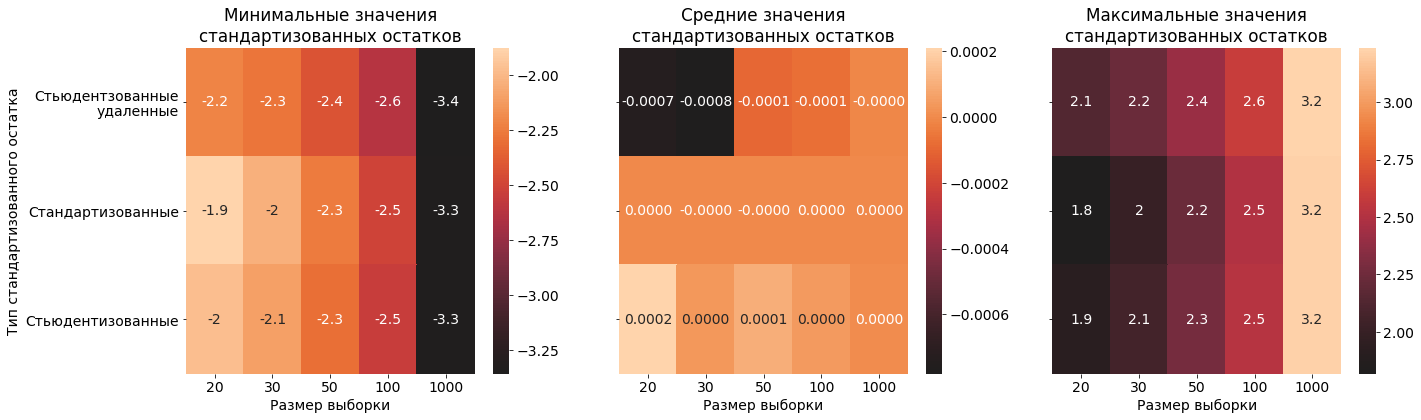

In [29]:
plt.figure(figsize=(22, 6))
plt.subplot(1, 3, 1)
heatmap(min_df, center=min_df.min().min(), annot=True,
        xticklabels=[20, 30, 50, 100, 1000],
        yticklabels=['Стьюдентзованные\nудаленные', 'Стандартизованные', 'Стьюдентизованные'])
plt.xlabel("Размер выборки")
plt.ylabel("Тип стандартизованного остатка")
plt.title("Минимальные значения\nстандартизованных остатков")

plt.subplot(1, 3, 2)
heatmap(mead_df, center=mead_df.min().min(), annot=True,
        xticklabels=[20, 30, 50, 100, 1000],
        yticklabels=['', '', ''],
       fmt=".4f")
plt.xlabel("Размер выборки")
plt.ylabel("")
# plt.ylabel("Тип стандартизованного остатка")
plt.title("Средние значения\nстандартизованных остатков")

plt.subplot(1, 3, 3)

heatmap(max_df, annot=True, center=max_df.min().min(),
        xticklabels=[20, 30, 50, 100, 1000],
        yticklabels=['', '', ''])
plt.xlabel("Размер выборки")
plt.ylabel("")
# plt.ylabel("Тип стандартизованного остатка")
plt.title("Максимальные значения\nстандартизованных остатков")